In [97]:
import os
import sys
import re
import random
import math
import matplotlib
import pandas as pd
import numpy as np
import ipaddress as ip
from os.path import split
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import sklearn.ensemble as ek
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn import model_selection, tree, linear_model
from sklearn.externals import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import tree, DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import svm
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [98]:
#custom tokenizer for URLs. 
#first split - "/"
#second split - "-"
#third split - "."
#remove ".com" (also "http://", but i dont have "http://" in the dataset)
def getTokens(input):
    tokensBySlash = str(input.encode('utf-8')).split('/')
    allTokens = []
    for i in tokensBySlash:
        tokens = str(i).split('-')
        tokensByDot = []
        for j in range(0,len(tokens)):
            tempTokens = str(tokens[j]).split('.')
            tokensByDot = tokensByDot + tempTokens
        allTokens = allTokens + tokens + tokensByDot
    allTokens = list(set(allTokens))
    if 'com' in allTokens:
        allTokens.remove('com')
    return allTokens

#function to remove "http://" from URL
def trim(url):
    return re.match(r'(?:\w*://)?(?:.*\.)?([a-zA-Z-1-9]*\.[a-zA-Z]{1,}).*', url).groups()[0]


In [99]:
df = pd.read_csv(r'C:\Users\Kephas\Desktop\moretraining\dataset.csv',',',error_bad_lines=False)
df=df.sample(frac=1)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,URL,Lable
0,http://www.management-lab.com/,0
1,http://service-paypa.l-kunden-sicherheit.info/...,1
2,http://97.74.56.138/bio/editor/re.htm,1
3,http://shop.leanhdigital.com.vn/images/stories...,1
4,http://oei.org.ar/ibertic/red.php,1


In [100]:
len(df) #displaying 5 records

7030

In [101]:
#data['url'].values
x = df.iloc[:,0:1].values
y = df.iloc[:,1].values

In [102]:
#convert it into numpy array and shuffle the dataset
df = np.array(df)
random.shuffle(df)

In [103]:
#convert text data into numerical data for machine learning models
y = [d[1] for d in df]
corpus = [d[0] for d in df]
vectorizer = TfidfVectorizer(tokenizer=getTokens)
X = vectorizer.fit_transform(corpus)

In [104]:
#split the data set inot train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=100)

In [105]:
#prepare the model
lgr = LogisticRegression()
lgr.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [106]:
#make model prediction for the testing class

y_pred_class = lgr.predict(X_test)

In [107]:
print("Accuracy ",lgr.score(X_test, y_test))

Accuracy  0.9510668563300142


In [108]:
Dt = DecisionTreeClassifier()
Dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [109]:
y_pred_class = Dt.predict(X_test)

In [110]:
print("Accuracy ",Dt.score(X_test, y_test))

Accuracy  0.9533428165007113


In [111]:
#prepare the model
NB = MultinomialNB()
NB.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [112]:
y_pred_class = NB.predict(X_test)

In [113]:
print("Accuracy ",NB.score(X_test, y_test))

Accuracy  0.9635846372688478


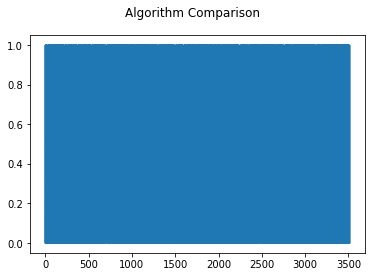

In [114]:
# Compare Algorithms

#plot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.plot(y_pred_class)
#x.set_xticklabels(names)
plt.show()

In [115]:
predicted = lgr.predict(X_test)
cm = confusion_matrix(y_test, predicted)
print(cm)

print("False positive rate : %.2f %%" % ((cm[0][1] / float(sum(cm[0])))*100))
print('False negative rate : %.2f %%' % ( (cm[1][0] / float(sum(cm[1]))*100)))

[[1724   89]
 [  83 1619]]
False positive rate : 4.91 %
False negative rate : 4.88 %


In [116]:
report = classification_report(y_test, predicted)
print(report)

             precision    recall  f1-score   support

          0       0.95      0.95      0.95      1813
          1       0.95      0.95      0.95      1702

avg / total       0.95      0.95      0.95      3515



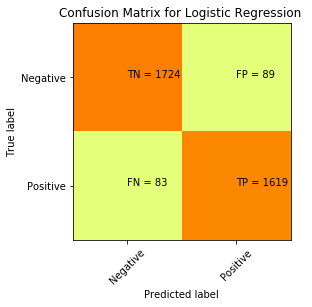

In [117]:
# Plot with Labels
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
plt.title('Confusion Matrix for Logistic Regression ')

#sns.heatmap(matrix,annot=True,fmt="d")
# Set x-axis label
classNames = ['Negative','Positive']
plt.xlabel('Predicted label')
# Set y-axis label
plt.ylabel('True label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [118]:
predicted = Dt.predict(X_test)
cm = confusion_matrix(y_test, predicted)
print(cm)

print("False positive rate : %.2f %%" % ((cm[0][1] / float(sum(cm[0])))*100))
print('False negative rate : %.2f %%' % ( (cm[1][0] / float(sum(cm[1]))*100)))

[[1720   93]
 [  71 1631]]
False positive rate : 5.13 %
False negative rate : 4.17 %


In [119]:
report = classification_report(y_test, predicted)
print(report)

             precision    recall  f1-score   support

          0       0.96      0.95      0.95      1813
          1       0.95      0.96      0.95      1702

avg / total       0.95      0.95      0.95      3515



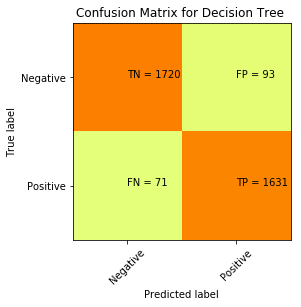

In [120]:
# Plot with Labels
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
plt.title('Confusion Matrix for Decision Tree ')

#sns.heatmap(matrix,annot=True,fmt="d")
# Set x-axis label
classNames = ['Negative','Positive']
plt.xlabel('Predicted label')
# Set y-axis label
plt.ylabel('True label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [121]:
predicted = NB.predict(X_test)
cm = confusion_matrix(y_test, predicted)
print(cm)

print("False positive rate : %.2f %%" % ((cm[0][1] / float(sum(cm[0])))*100))
print('False negative rate : %.2f %%' % ( (cm[1][0] / float(sum(cm[1]))*100)))

[[1771   42]
 [  86 1616]]
False positive rate : 2.32 %
False negative rate : 5.05 %


In [122]:
report = classification_report(y_test, predicted)
print(report)

             precision    recall  f1-score   support

          0       0.95      0.98      0.97      1813
          1       0.97      0.95      0.96      1702

avg / total       0.96      0.96      0.96      3515



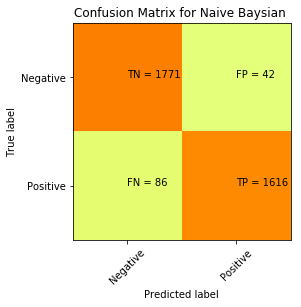

In [123]:
# Plot with Labels
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
plt.title('Confusion Matrix for Naive Baysian ')

#sns.heatmap(matrix,annot=True,fmt="d")
# Set x-axis label
classNames = ['Negative','Positive']
plt.xlabel('Predicted label')
# Set y-axis label
plt.ylabel('True label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [124]:
model = { "DecisionTree":tree.DecisionTreeClassifier(max_depth=10),
         "MNB":MultinomialNB(),
         "LogisticRegression":LogisticRegression()   
}

In [125]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y ,test_size=0.2)

In [132]:
results = {}
for algo in model:
    clf = model[algo]
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    print ("%s : %.2f " % (algo, score))
    results[algo] = score

DecisionTree : 0.92 
MNB : 0.98 
LogisticRegression : 0.97 


In [158]:
winner = max(results, key=results.get)
print("Best algorithm:", winner,results[winner])

Best algorithm: MNB 0.9829302987197724
